## Импорт данных

In [ ]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# ratings_full_df = pd.read_csv('./ratings.csv')
# movies_df = pd.read_csv('./movies.csv')
ratings_full_df = pd.read_csv('./ratings.csv')
movies_df = pd.read_csv('./movies.csv')

## ratings

In [ ]:
ratings_full_df

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
25000090,162541,50872,4.5,1240953372
25000091,162541,55768,2.5,1240951998
25000092,162541,56176,2.0,1240950697
25000093,162541,58559,4.0,1240953434


In [ ]:
ratings_df = ratings_full_df.drop(columns=['timestamp'])[:200000]
ratings_df

,userId,movieId,rating
0,1,296,5.0
1,1,306,3.5
2,1,307,5.0
3,1,665,5.0
4,1,899,3.5
...,...,...,...
199995,1409,48516,4.0
199996,1409,48696,4.0
199997,1409,48738,3.5
199998,1409,48774,4.0


In [ ]:
# Группируем средние по Пользователям
mean_user_ratings = ratings_df.groupby("userId")["rating"].mean()
mean_user_ratings

,rating
userId,
1,3.814286
2,3.630435
3,3.697409
4,3.378099
5,3.752475
...,...
1405,3.678369
1406,4.409091
1407,3.710938


In [ ]:
# Сливаем средние оценки отдельных пользователей в DF
ratings_df = ratings_df.merge(mean_user_ratings, how="left", on="userId", suffixes=("", "_user_mean"))
ratings_df

,userId,movieId,rating,rating_user_mean
0,1,296,5.0,3.814286
1,1,306,3.5,3.814286
2,1,307,5.0,3.814286
3,1,665,5.0,3.814286
4,1,899,3.5,3.814286
...,...,...,...,...
199995,1409,48516,4.0,3.090018
199996,1409,48696,4.0,3.090018
199997,1409,48738,3.5,3.090018
199998,1409,48774,4.0,3.090018


## movies

In [ ]:
movies_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [ ]:
# Группируем средние по фильмам
mean_movie_ratings = ratings_df.groupby('movieId')['rating'].mean()
mean_movie_ratings

,rating
movieId,
1,3.960499
2,3.384393
3,3.267544
4,2.937500
5,3.272277
...,...
206523,2.000000
206805,3.000000
206861,2.500000


In [ ]:
# Сливаем средние оценки по отдельным фильмам в DF
movies_df = movies_df.merge(mean_movie_ratings, how="left", on="movieId").rename({"rating":"ratings_movie_mean"}, axis=1)
movies_df

,movieId,title,genres,ratings_movie_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.960499
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.384393
2,3,Grumpier Old Men (1995),Comedy|Romance,3.267544
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.937500
4,5,Father of the Bride Part II (1995),Comedy,3.272277
...,...,...,...,...
62418,209157,We (2018),Drama,NaN
62419,209159,Window of the Soul (2001),Documentary,NaN
62420,209163,Bad Poems (2018),Comedy|Drama,NaN
62421,209169,A Girl Thing (2001),(no genres listed),NaN


## genres

In [ ]:
# Создание списка genres
genres_list = movies_df['genres'].apply(lambda x: x.split('|')) # .apply() - построчное применение
genres_list

,genres
0,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,"[Adventure, Children, Fantasy]"
2,"[Comedy, Romance]"
3,"[Comedy, Drama, Romance]"
4,[Comedy]
...,...
62418,[Drama]
62419,[Documentary]
62420,"[Comedy, Drama]"
62421,[(no genres listed)]


### Преобразуем жанры в бинарный формат

In [ ]:
# Преобразуем жанры в бинарный формат
# Векторизация
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
mlb.fit(genres_list)
list(mlb.classes_)

['(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [ ]:
# Трансформация данных
mlb.transform(genres_list)

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0]])

In [ ]:
# Create new DataFrame
genre_encoded = pd.DataFrame(mlb.transform(genres_list),
                             columns=mlb.classes_,
                             index=movies_df.index)
genre_encoded.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Конкатенируем новый DataFrame: genre_encoded с movies_df
movies_encoded = pd.concat([movies_df.drop('genres', axis=1), genre_encoded], axis=1)
movies_encoded.head()

,movieId,title,ratings_movie_mean,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),3.960499,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),3.384393,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),3.267544,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),2.937500,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),3.272277,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Задаём общий DataFrame
df = ratings_df.merge(movies_encoded, how="left", on="movieId")
df

,userId,movieId,rating,rating_user_mean,title,ratings_movie_mean,(no genres listed),Action,Adventure,Animation,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,296,5.0,3.814286,Pulp Fiction (1994),4.182081,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,306,3.5,3.814286,Three Colors: Red (Trois couleurs: Rouge) (1994),4.100000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,307,5.0,3.814286,Three Colors: Blue (Trois couleurs: Bleu) (1993),4.185185,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,665,5.0,3.814286,Underground (1995),4.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,899,3.5,3.814286,Singin' in the Rain (1952),4.082474,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,1409,48516,4.0,3.090018,"Departed, The (2006)",4.125592,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
199996,1409,48696,4.0,3.090018,Little Children (2006),3.909091,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
199997,1409,48738,3.5,3.090018,"Last King of Scotland, The (2006)",3.837209,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
199998,1409,48774,4.0,3.090018,Children of Men (2006),3.867769,0,1,1,0,...,0,0,0,0,0,0,1,1,0,0


In [ ]:
# Нахождение среднего жанра (приоритетности жанра) для пользователя
mean_genres_by_users = pd.concat(
    [
        df["userId"],
        # произведение жанров на оценку
        df[list(mlb.classes_)].multiply(df['rating'], axis=0)
    ], axis=1
).groupby("userId").mean()
# Получаем средний "взвешенный" рейтинг по каждому жанру
# Частота и рейтинг в конбинации
mean_genres_by_users

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
userId,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.235714,0.585714,0.114286,0.164286,1.271429,0.464286,0.028571,2.928571,0.257143,0.050000,0.050000,0.000000,0.264286,0.200000,1.071429,0.264286,0.307143,0.278571,0.035714
2,0.000000,1.326087,1.592391,0.334239,0.497283,1.135870,0.307065,0.000000,1.766304,0.627717,0.000000,0.065217,0.154891,0.195652,0.160326,0.584239,0.611413,0.625000,0.279891,0.067935
3,0.005335,1.853659,1.113567,0.303354,0.271341,0.926829,0.782012,0.014482,1.375762,0.444360,0.032774,0.243140,0.461128,0.032774,0.355945,0.323171,1.262195,1.345274,0.146341,0.045732
4,0.000000,1.909091,1.448347,0.444215,0.371901,1.208678,0.607438,0.084711,0.758264,0.456612,0.000000,0.130165,0.411157,0.105372,0.283058,0.142562,1.111570,0.820248,0.123967,0.105372
5,0.000000,0.663366,0.801980,0.148515,0.297030,1.732673,0.574257,0.000000,1.702970,0.277228,0.000000,0.138614,0.118812,0.257426,0.326733,0.702970,0.445545,0.950495,0.089109,0.148515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1405,0.000000,0.388448,0.297848,0.074745,0.135900,1.556059,0.593431,0.073613,2.151755,0.235561,0.106455,0.148358,0.006795,0.245753,0.272933,0.919592,0.177803,0.652322,0.199320,0.074745
1406,0.000000,0.409091,0.409091,0.454545,0.454545,1.590909,1.318182,0.000000,2.500000,0.000000,0.000000,0.409091,0.000000,0.000000,0.545455,0.590909,0.409091,1.000000,0.863636,0.000000
1407,0.000000,0.539062,0.562500,0.132812,0.320312,2.914062,0.398438,0.023438,0.859375,0.351562,0.015625,0.125000,0.000000,0.343750,0.187500,0.953125,0.304688,0.343750,0.195312,0.156250


In [ ]:
df = df.merge(mean_genres_by_users, how="left", on="userId", suffixes=("", "_mean_gen"))
df

,userId,movieId,rating,rating_user_mean,title,ratings_movie_mean,(no genres listed),Action,Adventure,Animation,...,Film-Noir_mean_gen,Horror_mean_gen,IMAX_mean_gen,Musical_mean_gen,Mystery_mean_gen,Romance_mean_gen,Sci-Fi_mean_gen,Thriller_mean_gen,War_mean_gen,Western_mean_gen
0,1,296,5.0,3.814286,Pulp Fiction (1994),4.182081,0,0,0,0,...,0.050000,0.050000,0.000000,0.264286,0.200000,1.071429,0.264286,0.307143,0.278571,0.035714
1,1,306,3.5,3.814286,Three Colors: Red (Trois couleurs: Rouge) (1994),4.100000,0,0,0,0,...,0.050000,0.050000,0.000000,0.264286,0.200000,1.071429,0.264286,0.307143,0.278571,0.035714
2,1,307,5.0,3.814286,Three Colors: Blue (Trois couleurs: Bleu) (1993),4.185185,0,0,0,0,...,0.050000,0.050000,0.000000,0.264286,0.200000,1.071429,0.264286,0.307143,0.278571,0.035714
3,1,665,5.0,3.814286,Underground (1995),4.000000,0,0,0,0,...,0.050000,0.050000,0.000000,0.264286,0.200000,1.071429,0.264286,0.307143,0.278571,0.035714
4,1,899,3.5,3.814286,Singin' in the Rain (1952),4.082474,0,0,0,0,...,0.050000,0.050000,0.000000,0.264286,0.200000,1.071429,0.264286,0.307143,0.278571,0.035714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,1409,48516,4.0,3.090018,"Departed, The (2006)",4.125592,0,0,0,0,...,0.020499,0.068627,0.045455,0.059715,0.199643,0.514260,0.340463,0.899287,0.386809,0.176471
199996,1409,48696,4.0,3.090018,Little Children (2006),3.909091,0,0,0,0,...,0.020499,0.068627,0.045455,0.059715,0.199643,0.514260,0.340463,0.899287,0.386809,0.176471
199997,1409,48738,3.5,3.090018,"Last King of Scotland, The (2006)",3.837209,0,0,0,0,...,0.020499,0.068627,0.045455,0.059715,0.199643,0.514260,0.340463,0.899287,0.386809,0.176471
199998,1409,48774,4.0,3.090018,Children of Men (2006),3.867769,0,1,1,0,...,0.020499,0.068627,0.045455,0.059715,0.199643,0.514260,0.340463,0.899287,0.386809,0.176471


## Обучение

In [ ]:
from sklearn.model_selection import train_test_split

# Разбиение выборки
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(["rating", "title"], axis=1), df["rating"], test_size=0.2, random_state=42)


In [ ]:
X_train

,userId,movieId,rating_user_mean,ratings_movie_mean,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Film-Noir_mean_gen,Horror_mean_gen,IMAX_mean_gen,Musical_mean_gen,Mystery_mean_gen,Romance_mean_gen,Sci-Fi_mean_gen,Thriller_mean_gen,War_mean_gen,Western_mean_gen
153248,1083,288,3.432432,3.051220,0,1,0,0,0,0,...,0.000000,0.153153,0.027027,0.054054,0.234234,0.738739,0.378378,1.378378,0.117117,0.162162
67802,542,91500,3.608571,3.461165,0,1,1,0,0,0,...,0.000000,0.474286,0.397143,0.020000,0.900000,0.142857,1.737143,1.725714,0.082857,0.000000
148889,1047,750,3.704545,4.181223,0,0,0,0,0,1,...,0.000000,0.136364,0.000000,0.181818,0.000000,1.000000,0.500000,0.840909,0.909091,0.000000
103093,783,47,4.028846,4.083710,0,0,0,0,0,0,...,0.096154,0.144231,0.423077,0.076923,0.548077,0.471154,0.509615,1.961538,0.432692,0.000000
104681,798,593,4.167683,4.151562,0,0,0,0,0,0,...,0.000000,0.073171,0.466463,0.125000,0.341463,0.893293,0.826220,1.054878,0.253049,0.079268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,861,1858,2.996416,2.916667,0,1,0,0,0,1,...,0.089606,0.215054,0.000000,0.010753,0.562724,0.397849,0.598566,1.365591,0.247312,0.236559
103694,789,2701,3.822917,2.233333,0,1,0,0,0,1,...,0.000000,0.145833,0.000000,0.093750,0.312500,0.562500,0.479167,1.166667,0.500000,0.041667
131932,939,32,3.914550,3.890819,0,0,0,0,0,0,...,0.015589,0.478060,0.095843,0.210739,0.304273,0.768476,0.877021,1.090647,0.105658,0.057159
146867,1036,1370,3.275120,3.554688,0,1,1,0,0,0,...,0.040670,0.155502,0.009569,0.138756,0.145933,0.468900,0.818182,0.631579,0.433014,0.126794


In [ ]:
y_train

,rating
153248,3.0
67802,4.0
148889,5.0
103093,4.0
104681,4.0
...,...
119879,1.0
103694,2.0
131932,4.0
146867,3.0


In [ ]:
df

,userId,movieId,rating,rating_user_mean,title,ratings_movie_mean,(no genres listed),Action,Adventure,Animation,...,Film-Noir_mean_gen,Horror_mean_gen,IMAX_mean_gen,Musical_mean_gen,Mystery_mean_gen,Romance_mean_gen,Sci-Fi_mean_gen,Thriller_mean_gen,War_mean_gen,Western_mean_gen
0,1,296,5.0,3.814286,Pulp Fiction (1994),4.182081,0,0,0,0,...,0.050000,0.050000,0.000000,0.264286,0.200000,1.071429,0.264286,0.307143,0.278571,0.035714
1,1,306,3.5,3.814286,Three Colors: Red (Trois couleurs: Rouge) (1994),4.100000,0,0,0,0,...,0.050000,0.050000,0.000000,0.264286,0.200000,1.071429,0.264286,0.307143,0.278571,0.035714
2,1,307,5.0,3.814286,Three Colors: Blue (Trois couleurs: Bleu) (1993),4.185185,0,0,0,0,...,0.050000,0.050000,0.000000,0.264286,0.200000,1.071429,0.264286,0.307143,0.278571,0.035714
3,1,665,5.0,3.814286,Underground (1995),4.000000,0,0,0,0,...,0.050000,0.050000,0.000000,0.264286,0.200000,1.071429,0.264286,0.307143,0.278571,0.035714
4,1,899,3.5,3.814286,Singin' in the Rain (1952),4.082474,0,0,0,0,...,0.050000,0.050000,0.000000,0.264286,0.200000,1.071429,0.264286,0.307143,0.278571,0.035714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,1409,48516,4.0,3.090018,"Departed, The (2006)",4.125592,0,0,0,0,...,0.020499,0.068627,0.045455,0.059715,0.199643,0.514260,0.340463,0.899287,0.386809,0.176471
199996,1409,48696,4.0,3.090018,Little Children (2006),3.909091,0,0,0,0,...,0.020499,0.068627,0.045455,0.059715,0.199643,0.514260,0.340463,0.899287,0.386809,0.176471
199997,1409,48738,3.5,3.090018,"Last King of Scotland, The (2006)",3.837209,0,0,0,0,...,0.020499,0.068627,0.045455,0.059715,0.199643,0.514260,0.340463,0.899287,0.386809,0.176471
199998,1409,48774,4.0,3.090018,Children of Men (2006),3.867769,0,1,1,0,...,0.020499,0.068627,0.045455,0.059715,0.199643,0.514260,0.340463,0.899287,0.386809,0.176471


### Метрики

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import pandas as pd

def evaluate_model(predict, y_test):
    metrics = {
        "Mean Squared Error (MSE)": mean_squared_error(y_test, predict),
        "Mean Absolute Error (MAE)": mean_absolute_error(y_test, predict),
        "Mean Absolute Percentage Error (MAPE)": mean_absolute_percentage_error(y_test, predict) * 100,
        "R-squared (R²)": r2_score(y_test, predict)
    }
    results_df = pd.DataFrame(metrics.items(), columns=["Metric", "Value"])
    print("\nModel Evaluation Metrics:")
    print(results_df.to_string(index=False, float_format="%.4f"))

### 1) Рекомендации на основе схожих пользователей

In [ ]:
def get_most_popular_rating(X_train, y_train, X_test, userId, movieId):
    movie_data = X_train[X_train["movieId"] == movieId]
    if movie_data.empty:
        return y_train.mean()
    else:
        return movie_data.iloc[0]["ratings_movie_mean"]

In [ ]:
predict = [get_most_popular_rating(X_train, y_train, X_test, userId, movieId) for userId, movieId in zip(X_test["userId"], X_test["movieId"])]
predict

[3.51025641025641,
 3.3076923076923075,
 3.211267605633803,
 3.2333333333333334,
 3.696765498652291,
 4.432803468208093,
 3.475,
 4.1515625,
 2.9655172413793105,
 3.5714285714285716,
 3.6446886446886446,
 3.1666666666666665,
 3.968503937007874,
 3.5172413793103448,
 4.193014705882353,
 4.133540372670807,
 4.08252427184466,
 3.7976190476190474,
 2.9375,
 4.369294605809128,
 3.7032967032967035,
 3.818696883852691,
 4.0041322314049586,
 3.3846153846153846,
 3.44,
 3.556122448979592,
 2.8333333333333335,
 3.950479233226837,
 3.412863070539419,
 3.3350515463917527,
 3.3767123287671232,
 4.180555555555555,
 3.1818181818181817,
 3.5208333333333335,
 3.731404958677686,
 2.9583333333333335,
 4.20404984423676,
 3.222591362126246,
 4.01010101010101,
 3.892123287671233,
 4.131578947368421,
 2.6944444444444446,
 3.8342105263157893,
 3.372549019607843,
 3.5727272727272728,
 3.1923076923076925,
 3.5106382978723403,
 3.2375,
 4.346153846153846,
 3.1,
 3.821167883211679,
 3.725,
 3.8838383838383836,
 3

In [ ]:
evaluate_model(predict, y_test)


Model Evaluation Metrics:
                               Metric   Value
             Mean Squared Error (MSE)  0.8719
            Mean Absolute Error (MAE)  0.7263
Mean Absolute Percentage Error (MAPE) 31.7253
                       R-squared (R²)  0.1991


In [ ]:
print(r2_score(y_test, y_test))
print(r2_score(y_test, [y_train.mean()]*len(y_test)))

1.0
-2.7037769885218665e-06


### 2) Рекомендация на основе среднего взвешенного рейтинга фильма и пользователя

In [ ]:
def get_recommendation(X_train, y_train, X_test, userId, movieId):
    movie_data = X_train[X_train["movieId"] == movieId]
    if movie_data.empty:
        return y_train.mean()
    user_data = X_test[X_test["userId"] == userId]

    movie_mean_rating = movie_data.iloc[0]["ratings_movie_mean"]
    user_mean_rating = user_data["rating_user_mean"].iloc[0]

    final_score = (0.5 * movie_mean_rating) + (0.5 * user_mean_rating)

    return final_score

In [ ]:
predict = [get_recommendation(X_train, y_train, X_test, userId, movieId) for userId, movieId in zip(X_test["userId"], X_test["movieId"])]
evaluate_model(predict, y_test)


Model Evaluation Metrics:
                               Metric   Value
             Mean Squared Error (MSE)  0.7807
            Mean Absolute Error (MAE)  0.6904
Mean Absolute Percentage Error (MAPE) 30.8110
                       R-squared (R²)  0.2828


In [ ]:
predict

[3.2533360904328648,
 3.5130010834236183,
 2.940269219483568,
 3.0855555555555556,
 3.4854019800953764,
 4.298401734104046,
 3.773516949152542,
 3.81942531779661,
 3.4400334474794936,
 3.816711590296496,
 3.6527014652014653,
 3.19963447209335,
 3.9142519685039368,
 3.5086206896551726,
 3.9254547213622293,
 3.9551999384015195,
 3.7424455678749924,
 3.731979778212655,
 3.1348016605166054,
 3.9427773842053773,
 3.4912364523348507,
 3.5463676726955766,
 3.804891668528032,
 3.2662626762305216,
 3.573503184713376,
 4.028061224489796,
 3.082718327183272,
 3.9089456869009584,
 3.8076712046911974,
 3.2135575192276224,
 3.6456309911734,
 3.8831349206349204,
 3.4489337822671153,
 3.60912093495935,
 3.602089465640213,
 2.9496810957758264,
 3.97702492211838,
 2.9676175201435826,
 3.9273478023478026,
 3.8184754369390648,
 3.864400584795322,
 3.3307665260196906,
 3.654174228675136,
 3.7939727990729732,
 3.402664775123653,
 3.212454984913863,
 3.2866275601511235,
 3.050638544891641,
 4.012261521038418

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(["userId", "movieId", "rating", "title"], axis=1), df["rating"], test_size=0.2, random_state=42)

### 3) Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
predict = linear_model.predict(X_test)
predict

array([3.02487216, 3.4644027 , 2.51576295, ..., 3.38143513, 4.03806422,
       4.18507385])

In [ ]:
evaluate_model(predict, y_test)


Model Evaluation Metrics:
                               Metric   Value
             Mean Squared Error (MSE)  0.6768
            Mean Absolute Error (MAE)  0.6307
Mean Absolute Percentage Error (MAPE) 26.8138
                       R-squared (R²)  0.3783


### 4) XGBoost (градиентный бустинг на деревьях)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
xgb_model = XGBRegressor()

In [ ]:
# !pip uninstall -y scikit-learn
!pip install scikit-learn==1.3.1

In [ ]:
!pip install --upgrade scikit-learn xgboost


  Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2


In [ ]:
print(type(X_train), type(y_train))
print(X_train.shape, len(y_train))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(160000, 42) 160000


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

xgb_model = XGBRegressor()

param_grid = {
    'max_depth': [7, 9, 10],              # Different depths for the trees
    'gamma': [0.1, 0.15, 0.3],            # Minimum loss reduction to make a split
    'alpha': [0.1, 0.15, 0.3],            # L1 regularization term on weights
    'reg_lambda': [1.5, 2, 2.5],          # L2 regularization term on weights
    'learning_rate': [0.02, 0.05, 0.1],   # Learning rate
    'n_estimators': [200, 300, 400]       # Number of trees
}

random_searc = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=50,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)
random_searc.fit(X_train, y_train)
best_params = random_searc.best_params_
best_model = random_searc.best_estimator_

print("Best Parameters:", best_params)
# Best Parameters: {'reg_lambda': 2.5, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.1, 'alpha': 0.15}

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'reg_lambda': 2.5, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.1, 'alpha': 0.15}


In [ ]:
predict = best_model.predict(X_test)

In [ ]:
evaluate_model(predict, y_test)


Model Evaluation Metrics:
                               Metric   Value
             Mean Squared Error (MSE)  0.6226
            Mean Absolute Error (MAE)  0.6010
Mean Absolute Percentage Error (MAPE) 24.9384
                       R-squared (R²)  0.4281


<BarContainer object of 42 artists>

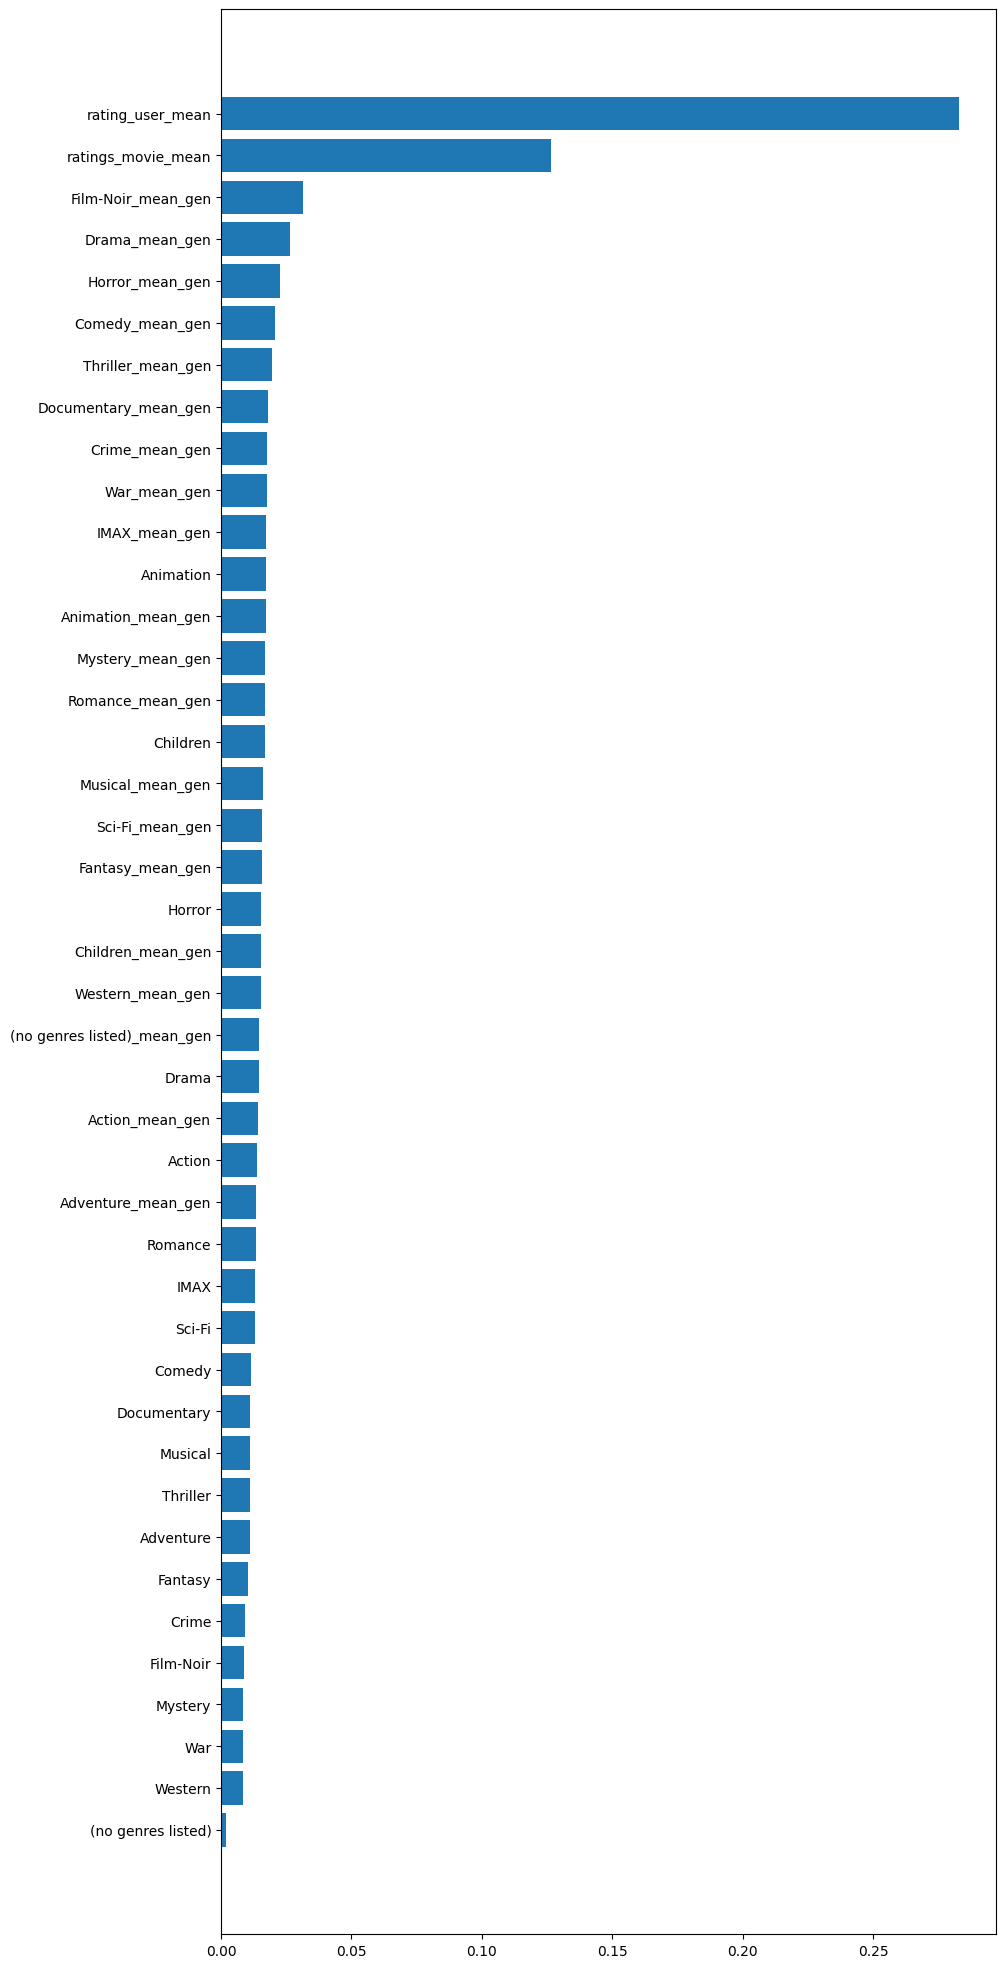

In [ ]:
import matplotlib.pyplot as plt

best_model.feature_importances_
sorted_idx = best_model.feature_importances_.argsort()
plt.figure(figsize=(10,25))
plt.barh(X_test.columns[sorted_idx], best_model.feature_importances_[sorted_idx])

In [ ]:
print(ratings_df[ratings_df["userId"] == 2].merge(movies_df, how="left", on="movieId")[["movieId", "rating", "title"]].to_string())

     movieId  rating                                                                                           title
0          1     3.5                                                                                Toy Story (1995)
1         62     0.5                                                                       Mr. Holland's Opus (1995)
2        110     5.0                                                                               Braveheart (1995)
3        150     4.0                                                                                Apollo 13 (1995)
4        151     4.5                                                                                  Rob Roy (1995)
5        236     4.0                                                                              French Kiss (1995)
6        260     5.0                                                       Star Wars: Episode IV - A New Hope (1977)
7        261     0.5                                            

In [ ]:
df[df["userId"]==2].iloc[3]

,73
userId,2
movieId,150
rating,4.0
rating_user_mean,3.630435
title,Apollo 13 (1995)
ratings_movie_mean,3.903186
(no genres listed),0
Action,0
Adventure,1
Animation,0


In [ ]:
best_model.predict([df[df["userId"]==2].iloc[3].drop(["userId", "movieId", "title", "rating"])])

array([4.400017], dtype=float32)

In [ ]:
movies_df[movies_df["movieId"]==150]

,movieId,title,genres,ratings_movie_mean
148,150,Apollo 13 (1995),Adventure|Drama|IMAX,3.903186
